In [16]:
from PIL import Image, ImageEnhance, ImageOps
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os
from tqdm.notebook import tqdm # 진행시간 시각적 표시

# directory path

In [32]:
train_dir = '/content/drive/MyDrive/project/manufacturing/data/casting_data/train'  # Set your path
test_dir = '/content/drive/MyDrive/project/manufacturing/data/casting_data/test'
file_path = '/content/drive/MyDrive/project/manufacturing/data'

# Global parameters

In [18]:
#image
image_width = 300
image_height = 300
###channels = 3  # I don't use this. I acquired the gray scale data.

#adaptive threshold
maxval = 255
thresh = 0
k = 5
C = 5

# Data Acquisition

acquire data which is in current directory (ok and def). Also,there are  functions to save the data and load the data. If you use the load function, you don't have to wait for the acquisitions which need almost 2 hours. 

In [42]:
class Data_Acquisition():
  def ok_acquisition(file_dir):
    dir_path = file_dir+'/ok_front/'
    X_ok = np.ndarray(shape=(len(os.listdir(dir_path)), image_height, image_width), dtype=np.float32)
    for filename in tqdm(os.listdir(dir_path)):
      image_path = dir_path+filename
      #if (len(os.listdir(dir_path))-(os.listdir(dir_path).index(filename)+1))%500 == 0 :
      #  print(str(len(os.listdir(dir_path))-(os.listdir(dir_path).index(filename)+1))+' files left in ok class')
      img = cv2.imread(image_path,0) #gray scale
      X_ok[os.listdir(dir_path).index(filename)] = img

    print(X_ok.shape)
    y_ok = np.ones((len(X_ok),1))
    return X_ok, y_ok

  def def_acquisition(file_dir):
    dir_path = file_dir+'/def_front/'
    X_def = np.ndarray(shape=(len(os.listdir(dir_path)), image_height, image_width), dtype=np.float32)
    for filename in tqdm(os.listdir(dir_path)):
      image_path = dir_path+filename
      #if (len(os.listdir(dir_path))-(os.listdir(dir_path).index(filename)+1))%500 == 0 :
      #  print(str(len(os.listdir(dir_path))-(os.listdir(dir_path).index(filename)+1))+' files left in def class')
      img = cv2.imread(image_path,0) #gray scale
      X_def[os.listdir(dir_path).index(filename)] = img

    print(X_def.shape)
    y_def = np.ones((len(X_def),1))
    return X_def, y_def

  def concatenate_dataset(X_ok, X_def, y_ok, y_def):
    length = len(X_ok) + len(X_def)
    print(length)
    X_raw = np.ndarray(shape=(length, image_height, image_width), dtype=np.float32)
    for i in tqdm(range(len(X_ok))):
        X_raw[i] = X_ok[i]
    for x in tqdm(range(len(X_def))):
        X_raw[i+x+1] = X_def[x]
    y_raw = np.append(y_ok, y_def)
    return X_raw, y_raw

  def save_dataset(X_raw, y_raw, file_path, X_ok, X_def, y_ok, y_def):
    np.savez((file_path+'/Raw_Dataset.npz'), inputs=X_raw, targets=y_raw, inputs_ok=X_ok, targets_ok=y_ok, inputs_def=X_def, targets_def=y_def)
    print('Saved!')

  #Load dataset from file
  def load_dataset(file_path):
    dataset = np.load((file_path+'/Raw_Dataset.npz'))
    X_raw = dataset['inputs']
    y_raw = dataset['targets']
    X_ok =  dataset['inputs_ok']
    y_ok = dataset['targets_ok']
    X_def = dataset['inputs_def']
    y_def = dataset['targets_def']
    print('Loaded!')
    return X_raw, y_raw, X_ok, y_ok, X_def, y_def

# Data Preprocessing

At the acquisition part, I already did the gray scaling. So, in this part, I just have to do adaptive threshold. If you want to add more processing, then you can add more function in the Data_Preprocessing class. 

* Adaptive_Threshold part : At the acquisition part, I saved the all data to have float datatype. But, this function need a uint8 datatype, so I convert each of them.

In [57]:
class Data_Preprocessing():
  def Adaptive_Threshold(X,maxval=255,thresh=0,k=5,C=5):
    X_th = np.ndarray(shape=(len(X), image_height, image_width), dtype=np.uint8)
    i=0
    for img in tqdm(X):
      img = img.astype('uint8')
      th = cv2.adaptiveThreshold(img, maxval, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, k, C)
      X_th[i] = th
      i += 1

    return X_th

In [24]:
#X_ok, y_ok = Data_Acquisition.ok_acquisition(train_dir)


(2875, 300, 300)


In [25]:
#X_def, y_def = Data_Acquisition.def_acquisition(train_dir)


(3758, 300, 300)


In [30]:
#X_raw, y_raw = Data_Acquisition.concatenate_dataset(X_ok, X_def, y_ok, y_def)

6633


In [37]:
#Data_Acquisition.save_dataset(X_raw, y_raw, file_path, X_ok, X_def, y_ok, y_def)

Saved!


In [43]:
#X_raw, y_raw, X_ok, y_ok, X_def, y_def = Data_Acquisition.load_dataset(file_path)

Loaded!


In [58]:
#X_raw = Data_Preprocessing.Adaptive_Threshold(X_raw)

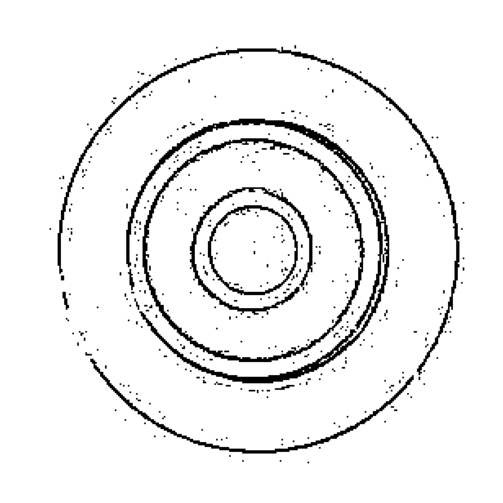

(300, 300)


In [59]:
'''
plt.figure(figsize=(9, 9))
plt.imshow(X_raw[0], cmap='gray')
plt.axis("off")
plt.show()

print(X_raw[0].shape)
'''